In [20]:
# import necessary functions
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [159]:
from hybridstablemodel.model.statespace import Linear, Nonlinear
from hybridstablemodel.simulator import ContinuousSimulator, DiscreteSimulator
from hybridstablemodel.system.cartpole import CartPole
from hybridstablemodel.plot.plot_simulation_results import plot_states, plot_outputs, plot_inputs, plot_comparison
import matplotlib.pyplot as plt
import numpy as np

In [249]:
system = CartPole(mu_c=0, mu_p=0.01)
x_bar = np.array([[0], [0], [np.pi], [0]])
A, B = system.get_linearization(x_bar=x_bar)
print(f'A_lin: \n{A} \n B_lin: \n{B}')

A_lin: 
[[ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -7.17804878e-01 -1.46341463e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.57917073e+01 -3.21951220e-01]] 
 B_lin: 
[[0.        ]
 [0.97560976]
 [0.        ]
 [1.46341463]]


In [254]:
nl_model = Nonlinear(
    f=system.state_dynamics, g=system.output_function, nx=4, nu=1, ny=1
)

In [255]:
lin_model = Linear(
    A=A,
    B=B,
    C=np.array([[0, 0, 1, 0]]),
    D = np.array([[0]]),
    x_bar=x_bar
)

In [304]:
T_end = 10
step_size = 0.01
N = int(T_end/step_size)
x0 = np.array([[0], [0], [np.pi/2], [0]])
us = [np.array([[u]]) for u in np.zeros(N)]

sim = ContinuousSimulator(T=T_end, step_size=step_size)
lin_res, _ = sim.simulate(
    model=lin_model,
    initial_state=x0,
    input=us,
    name = 'lin',
    x_bar=x_bar
)
nl_res, _ = sim.simulate(
    model=nl_model,
    initial_state=x0,
    input=us,
    name='non lin'
)

nx = A.shape[0]
A_d = (A*step_size + np.eye(nx))
B_d = B*step_size
C_d = np.array([[0, 0, 1, 0]])
D_d = np.array([[0]])

lin_model_d = Linear(
    A=A_d,
    B=B_d,
    C=C_d,
    D=D_d,
)

sim_d = DiscreteSimulator(T=T_end, step_size=step_size)
lin_res_d = sim_d.simulate(
    model=lin_model_d,
    initial_state=x0,
    input=us,
    name='lin disc', 
    x_bar=x_bar
)


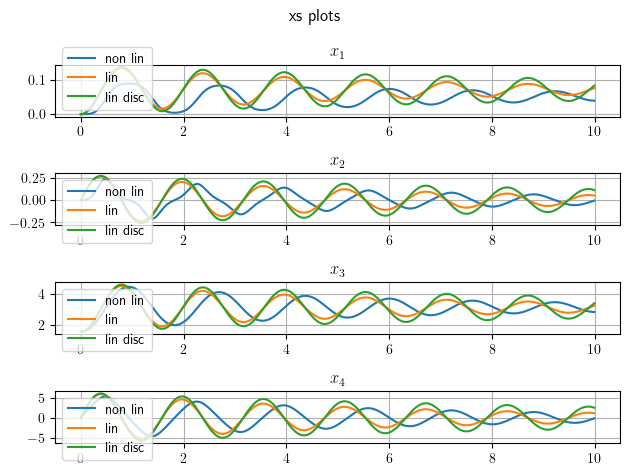

In [306]:

plot_comparison(results=[nl_res, lin_res, lin_res_d], type='xs')
